**Dataset-1:** This part of the lab will use a linearly separable dataset.

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from ipywidgets import interact, fixed

**Step-2: Load the Data:** The next step is to load the data. In this part, we will generate some data points and use them as our dataset. We will use the make_blobs function: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

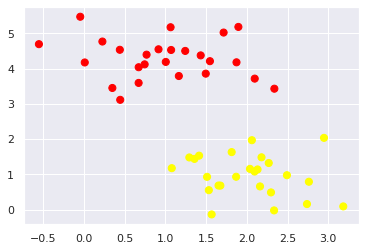

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

**Step-3: Train SVC Model:** This is linrealy separable data. We do not need to use a polynomial or RBF kernel.

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Let's print our support vectors

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

To have a better visualization, let's plot the data, the support vectors, and see the classifier line. We will implement a function for that purpose.

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() #create a new axis if there is no axis in the fig.
    xlim = ax.get_xlim() #if there is an axis, get the x-axis limit
    ylim = ax.get_ylim() #if there is an axis, get the x-axis limit

    # create grid to evaluate model - x is the horizontal axis, y is the vertical axis (not to e confused with the label)
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape) #Evaluate the decision function for the samples in xy.

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Now, let's call this function.

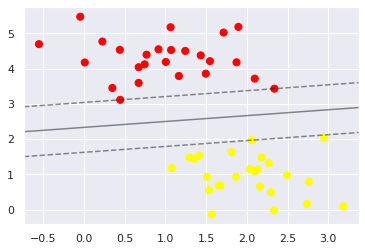

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

If you want to test the model, use model.predict

In [ ]:
y == model.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Now, let's manually vary C and see what happens

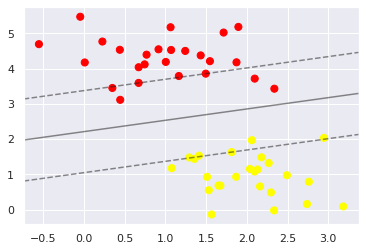

In [ ]:
model2 = SVC(kernel='linear', C=0.1)
model2.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model2)

As you can see the support vectors have changed and so the classifier.

**Dataset-2:** This part of the lab will use a non-linearly separable dataset.

**Step-2: Load the Data:** In this part, we will generate some data points and use them as our dataset. We will use the make_circles function: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

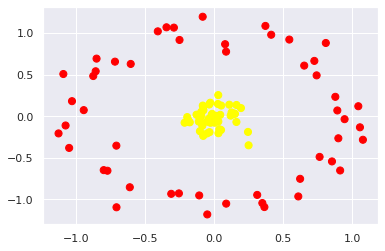

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Step-3: Train SVM Model:** This is non-linrealy separable data. Let's see if we can separate the two classes using a linear classifier.

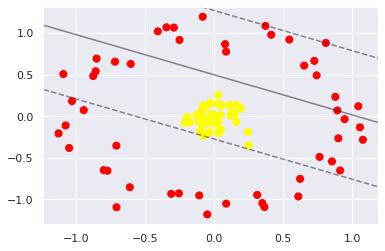

In [ ]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
y == clf.predict(X)

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True, False,  True, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True])

So many misclassifactions!!

Let's implement see what happens when an RBF kernel function is applied to the data.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Let's plot the data after applying the RBF kernel:

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-150,150], azip=(-180,180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-150, 150), value=-150), IntSlider(value=30, descr…

As you can see, data now can be separated into two different planes. The r-axis should be reversed though (i.e, minimum "0.2" at buttom and maximum "1.0" at top) such that the yellow circles are shown on top plane and red circles are shown in the bottom plane. I could not find the correct rotation for elev and azip angles to make the plot. But the idea is still clear: the two classes are separated into two different planes. Let's implement a classifier that can separate the two classes.

We will use SVC fucntion with kernel defined as rbf:

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Let's plot the decision boundary and support vectors

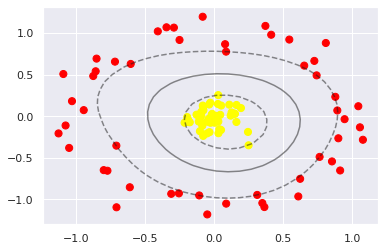

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

**Dataset-3** This is the solution to your assignment. Please upload the dataset from iLearn to Google Colab.

**Step-1: Import Libraries:** We will need couple of extra libraries in addition to what we had before.

In [ ]:
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

**Step-2: Load the Data:** The dataset is stored in .csv format. We will load the data as we did in the Linear and Logistic Regression Lab.

In [ ]:
data = pd.read_csv("Dataset.csv")
data

,Xtrain,Unnamed: 1,ytrain,ytest,Xtest,Unnamed: 5
0,-0.15899,0.42398,1,0.0,-0.353060,-0.67390
1,-0.34793,0.47076,1,1.0,-0.227130,0.44732
2,-0.50461,0.35380,1,0.0,0.092898,-0.75352
3,-0.59677,0.11403,1,0.0,0.148240,-0.71847
4,-0.51843,-0.17252,1,0.0,-0.001512,0.16293
...,...,...,...,...,...,...
206,-0.39988,-0.62193,1,NaN,NaN,NaN
207,-0.12408,-0.12661,1,NaN,NaN,NaN
208,-0.31694,-0.22895,1,NaN,NaN,NaN
209,-0.29412,-0.13479,0,NaN,NaN,NaN


As you can see the test data has empty cells and these were marked as NaN. We will exclude those cells.

In [ ]:
data = data.to_numpy()
X_train = data[:,:2]
y_train = data[:,2]
X_test = data[:200,4:]
y_test = data[:200,3]

Next, we will plot the data. We will use the plot function we created in the Logistic Regression Lab.

In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

Now, we plot:

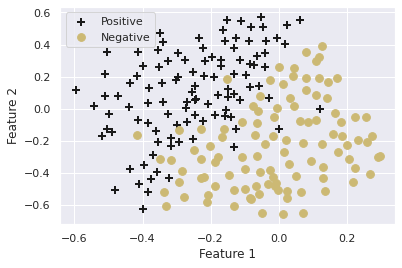

In [ ]:
data_train = data[:,:3]
plotData(data_train, 'Feature 1', 'Feature 2', 'Positive', 'Negative', axes=None)

**Step-3: Train SVM:** Here, we will do hyper-parameter tuning. We will follow the steps below:

*Step 3.1: Define your model:*

In [ ]:
model = SVC()

*Step 3.2: Define Cross Validation:*

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

Step 3.3: Define Search Space:

In [ ]:
space = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

Step 3.4: Define Search Method: We will use a random grid search method.

In [ ]:
search = RandomizedSearchCV(model, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

Step 3.5: Execute the Search and Summarize the Results:

In [ ]:
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score: 0.9225913621262459
Best Hyperparameters: {'kernel': 'linear', 'C': 10}


Step 3.6: Train your Model with Optimal Hyper-parameters:

In [ ]:
model_opt = SVC(kernel='linear', C=10)
model_opt.fit(X_train, y_train)

SVC(C=10, kernel='linear')

Step 3.7: Plot the Decision Boundary:

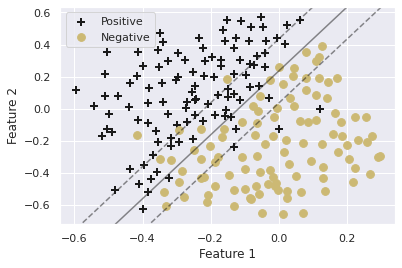

In [ ]:
plotData(data_train, 'Feature 1', 'Feature 2', 'Positive', 'Negative')
plot_svc_decision_function(model_opt)

**Step-4: Test SVM Model:** Here, we will apply our model on the test data and report the performance.

In [ ]:
y_pred = model_opt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       113
         1.0       0.95      0.90      0.92        87

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

